In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree



In [89]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [91]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [92]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [93]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [94]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [95]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

C:\Users\Jason\AppData\Local\Temp\ipykernel_10356\3178132373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [96]:
# Selecting relevant features
features = ['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q','Embarked_S', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

In [97]:
# Define features (X) and target (y)
X = titanic_df[features]
y = titanic_df[target]

In [98]:
X.isnull().sum()

Pclass        0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [99]:
# Split the data: 60% training, 20% development, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [100]:
X_train.isnull().sum()

Pclass        0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [101]:
#Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

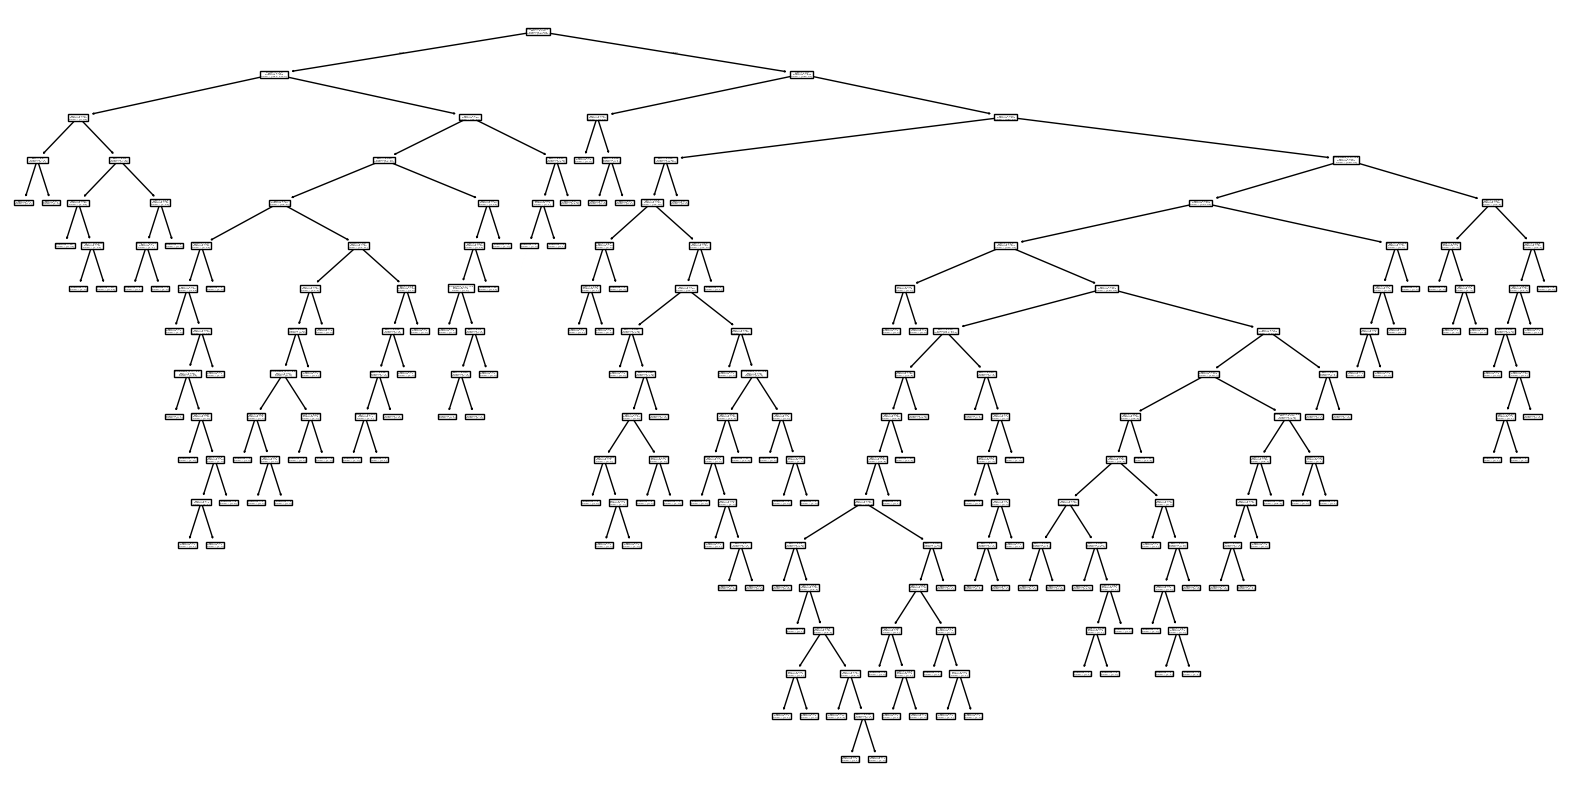

In [102]:
#Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=features)
plt.show()

In [103]:
#Get accuracy of Decision Tree on development set
y_pred_dev = tree_model.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred_dev)
accuracy

0.6910112359550562

In [104]:
#Prepare lists to store accuracies
max_depths = range(2, 11)
train_accuracies = []
dev_accuracies = []

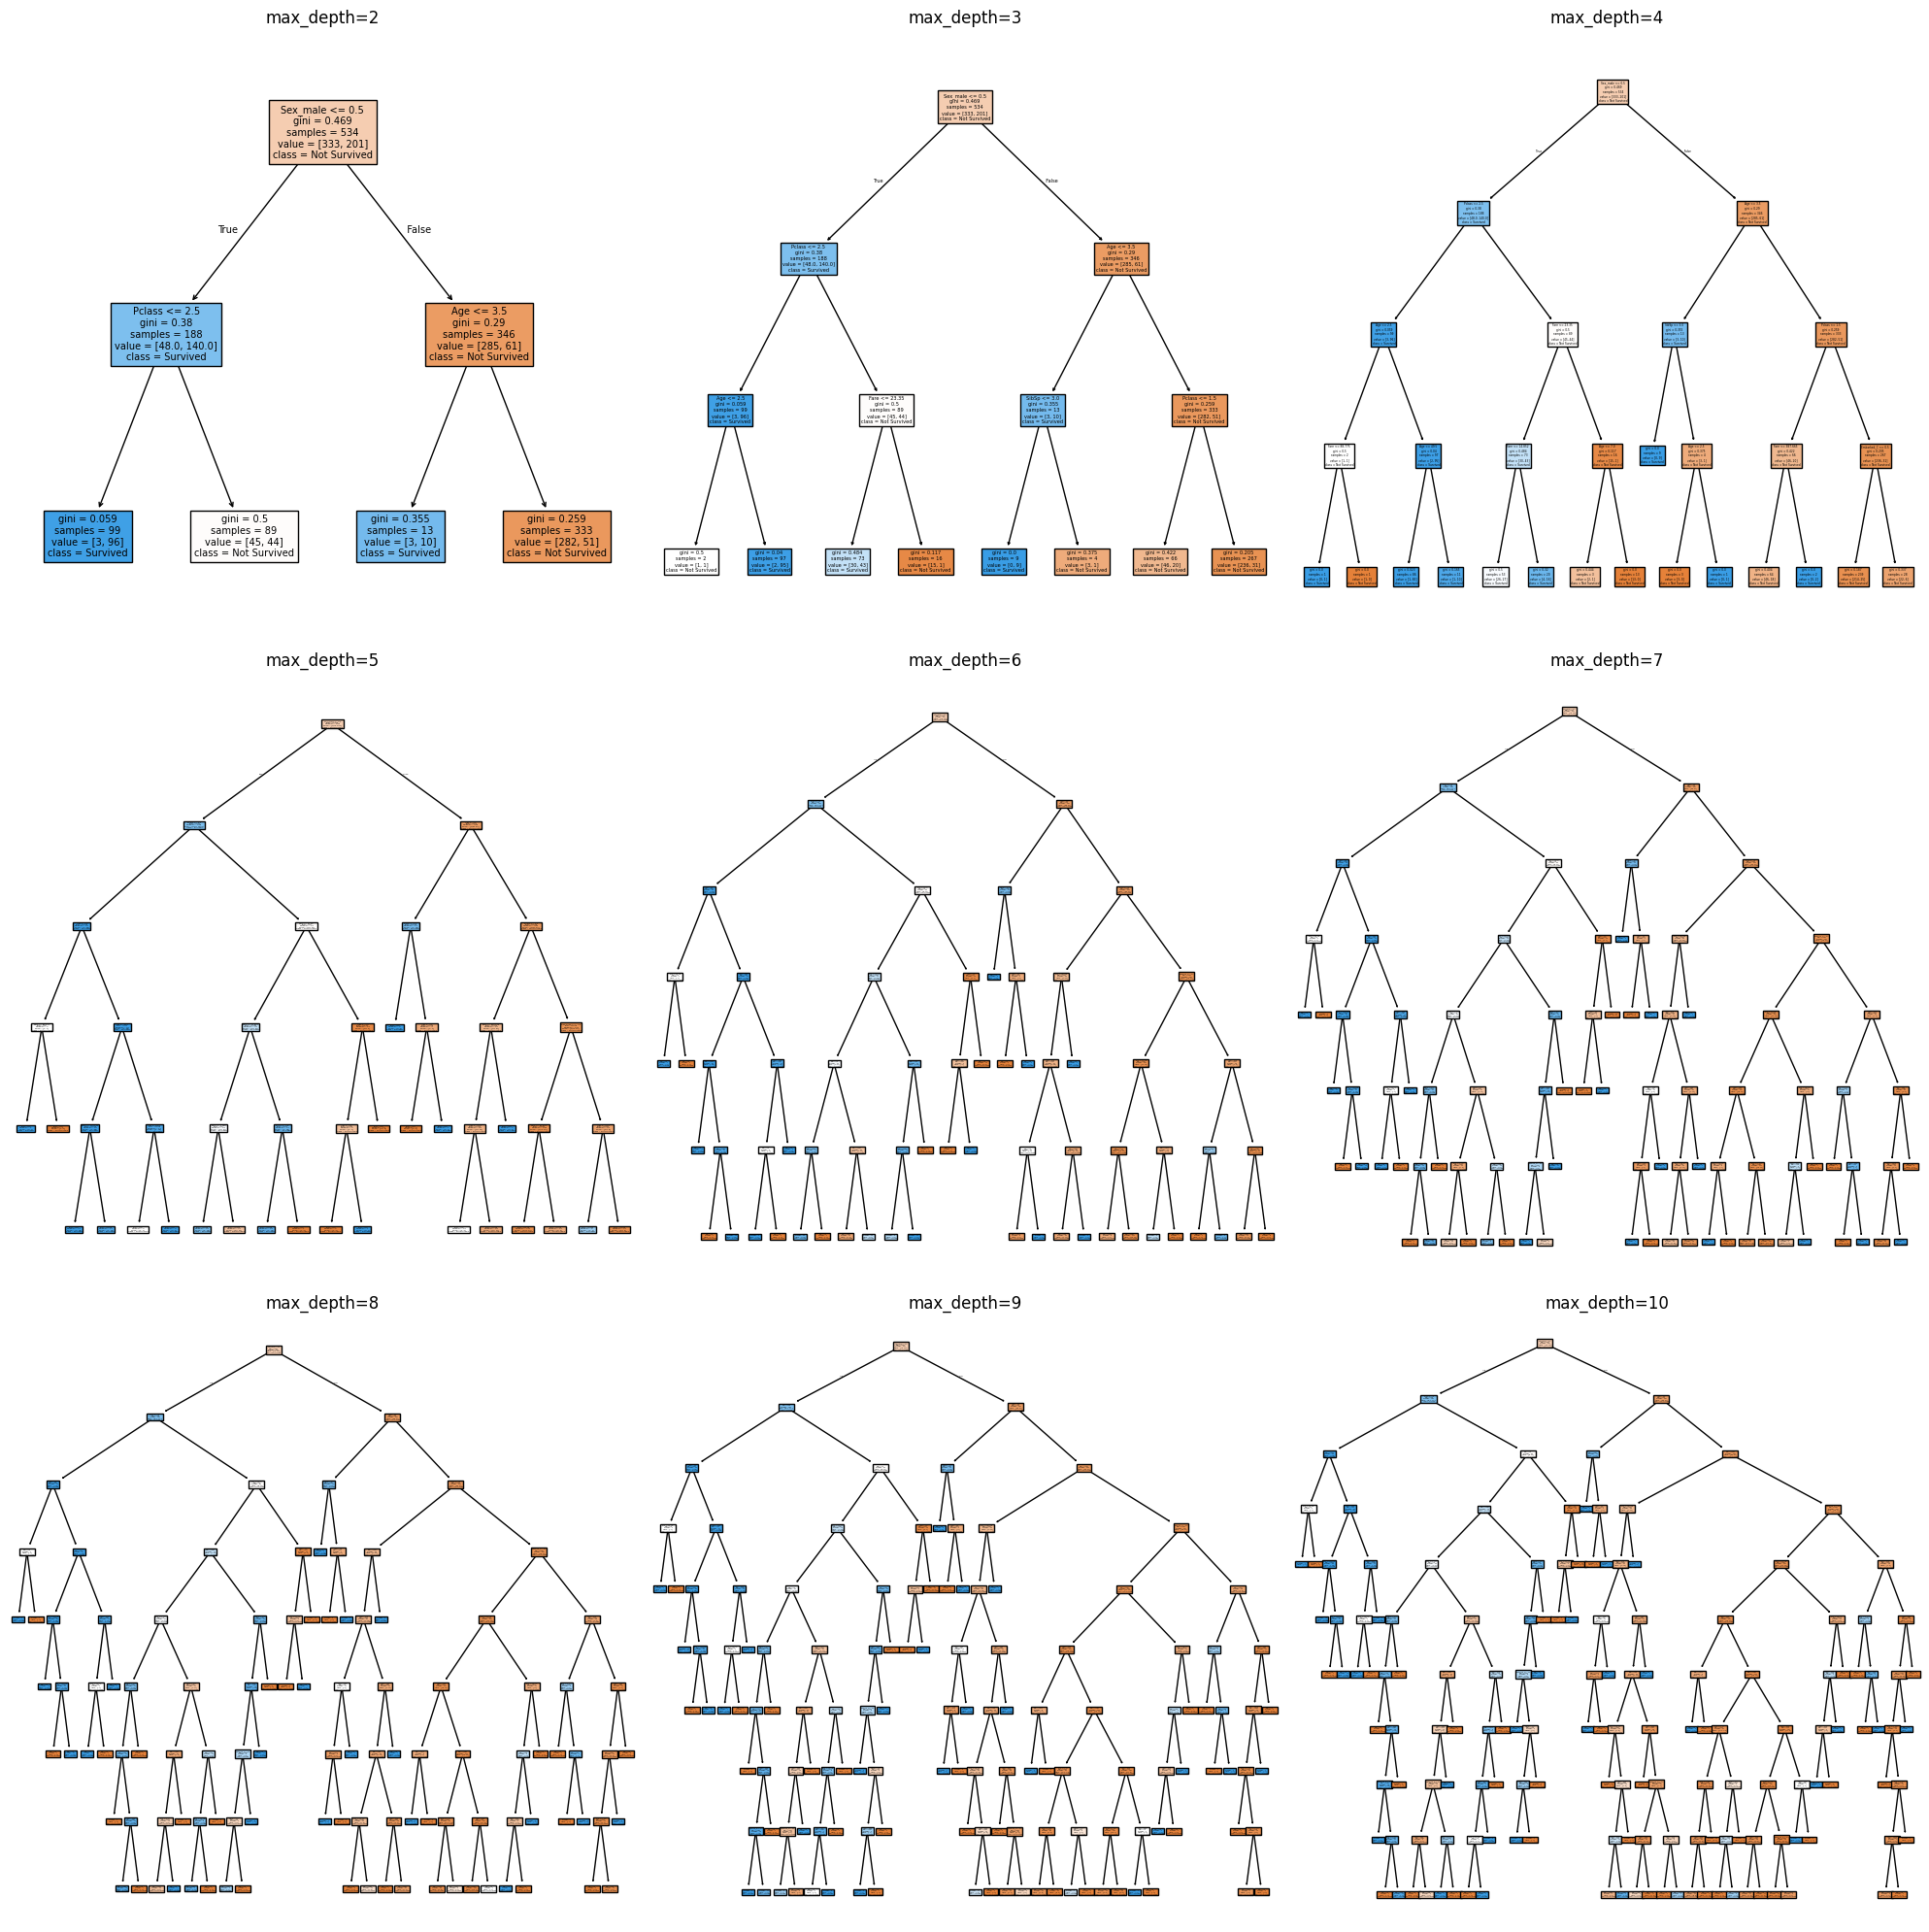

In [105]:
#Set up subplots for trees
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()
#Loop over different values of max_depth
for idx, max_depth in enumerate(max_depths):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on training and development sets
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

    # Compute accuracies for both
    train_acc = clf.score(X_train, y_train)
    dev_acc = clf.score(X_dev, y_dev)
    # Store accuracies
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)
    
    #Plot the decision tree
    tree.plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, ax=axes[idx])
    axes[idx].set_title(f'max_depth={max_depth}')

#Adjust layout
plt.tight_layout()
plt.show()


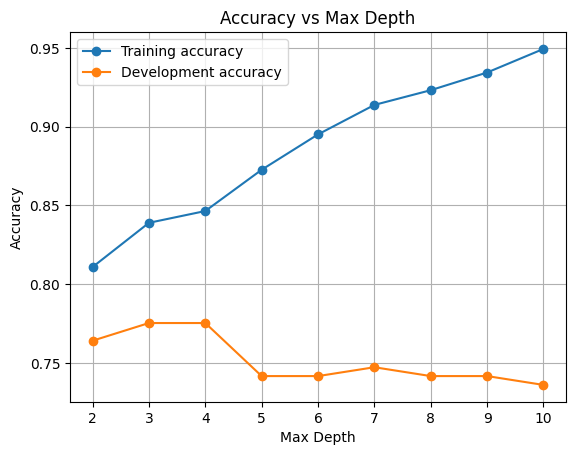

In [119]:
# Plot training and development accuracies
plt.plot(max_depths, train_accuracies, marker='o', label='Training accuracy')
plt.plot(max_depths, dev_accuracies, marker='o', label='Development accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.grid(True)

In [107]:
# Choose the best max_depth based on development set accuracy
best_max_depth = max_depths[np.argmax(dev_accuracies)]
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [108]:
# Compute accuracy on the test set
accuracy_test = final_model.score(X_test, y_test)
print(f'Test Set Accuracy: {accuracy_test:.4f}')

Test Set Accuracy: 0.8212


Task 21

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
#Creating the bagged, random forest and boosted trees
bagging_clf = BaggingClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [111]:
#Getting feature names
X_train.columns

Index(['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [112]:
# Feature importances
importances= random_forest_clf.feature_importances_
importances

array([0.08617562, 0.14206043, 0.16091493, 0.01446773, 0.00834221,
       0.01950273, 0.24294767, 0.04208399, 0.0395913 , 0.24391339])

Text(0.5, 1.0, 'Feature Importance')

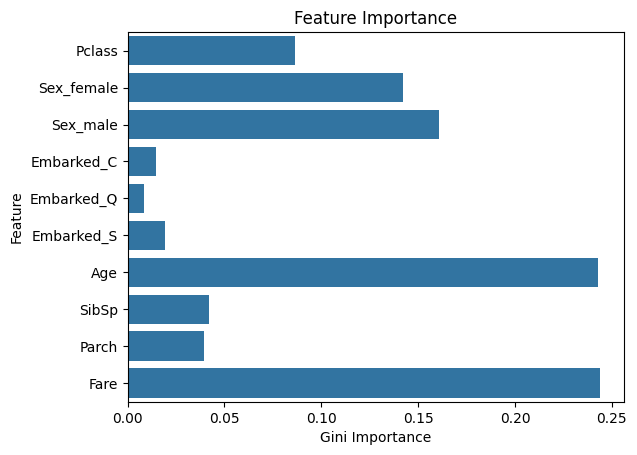

In [120]:
import seaborn as sns

#Visualise the iportances
importances_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances})
importances_df

sns.barplot(x=importances_df['Gini Importance'], y=importances_df['Feature'], data= importances_df)
plt.title("Feature Importance")

From this you can see that age and fare have the most importance as they have the highest score so this helps decide whether they survived or not then it was based on sex and then class. 

In [114]:
from sklearn.model_selection import GridSearchCV

#Choose the model
boosting_clf = GradientBoostingClassifier(random_state=42)
# Set up a parameter grid
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [3,4,5]
}
# Creating the GridSearchCV object
grid_search = GridSearchCV(
    estimator = boosting_clf,
    param_grid = param_grid,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [115]:
# Get the report
results = pd.DataFrame(grid_search.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039433,0.000848,0.001488,0.000446,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.869159,0.841121,0.803738,0.785047,0.849057,0.829624,0.030757,3
1,0.075675,0.000411,0.001697,0.000399,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.841121,0.850467,0.822430,0.794393,0.867925,0.835267,0.025169,1
2,0.149876,0.000846,0.001696,0.000600,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.831776,0.859813,0.813084,0.831776,0.839623,0.835214,0.015086,2
3,0.051634,0.000903,0.001796,0.000399,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.831776,0.831776,0.803738,0.803738,0.867925,0.827791,0.023662,5
4,0.100924,0.000908,0.001498,0.000446,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.841121,0.859813,0.785047,0.822430,0.839623,0.829607,0.025229,4
5,0.201124,0.001532,0.002188,0.000551,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.794393,0.831776,0.766355,0.813084,0.811321,0.803386,0.021978,8
6,0.071170,0.003898,0.001499,0.000445,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.822430,0.822430,0.803738,0.794393,0.849057,0.818409,0.018781,6
7,0.139611,0.003970,0.001498,0.000446,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.775701,0.822430,0.785047,0.803738,0.839623,0.805308,0.023496,7
8,0.279903,0.004266,0.001904,0.000201,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.766355,0.794393,0.775701,0.803738,0.830189,0.794075,0.022377,9


In [116]:
# Extract only the columns we are interested in
results[['param_n_estimators','param_max_depth','mean_test_score']]

,param_n_estimators,param_max_depth,mean_test_score
0,50,3,0.829624
1,100,3,0.835267
2,200,3,0.835214
3,50,4,0.827791
4,100,4,0.829607
5,200,4,0.803386
6,50,5,0.818409
7,100,5,0.805308
8,200,5,0.794075


In [117]:
# Report on the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best score found: {best_score}")


Best parameters found: {'max_depth': 3, 'n_estimators': 100}
Best score found: 0.8352671486510316
